# Background: 
Uber Technologies, Inc. is an American multinational transportation network company based in San Francisco and has operations in over 785 metropolitan areas worldwide with over 110 million users worldwide. Ridesharing is a very volatile market and demand fluctuates wildly with time, place, weather, local events, etc. The key to being successful in this business is to be able to detect patterns in these fluctuations and cater to the demand at any given time. As a newly hired Junior Data Scientist in Uber’s New York Office, you have been given the task of extracting insights from data that will help the business grow. Good insights are ones which are actionable and make business sense.

# Objective: 
To extract actionable insights that will enable growth in the market

# Key Questions:
1. What are the different variables that influence pickups?
2. Which factor affects the pickups the most? What could be plausible reasons for that?
3. What are your recommendations to Uber management to capitalize on fluctuating demand?

# Data:
The data contains weather information, location and no. of pickups

* pickup_dt: Date and time of the pick up.
* borough: NYC's borough.
* pickups: Number of pickups for the period.
* spd: Wind speed in miles/hour.
* vsb: Visibility in miles to nearest tenth.
* temp: Temperature in Fahrenheit.
* dewp: Dew point in Fahrenheit.
* slp: Sea level pressure.
* pcp01: 1-hour liquid precipitation.
* pcp06: 6-hour liquid precipitation.
* pcp24: 24-hour liquid precipitation.
* sd: Snow depth in inches.
* hday: Being a holiday (Y) or not (N).

### Import the necessary libraries - pandas, numpy, seaborn, matplotlib.pyplot

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns

### Read in the dataset

In [2]:
path = 'D:/case study/uber case study/'
data = pd.read_csv(path+'Uber.csv')

In [3]:
# copying data to another varaible to avoid any changes to original data
df = data.copy()

### View the first few rows of the dataset

In [4]:
# looking at head (5 observations) 
df.head()

pickup_dt    borough  pickups  spd   vsb  temp  dewp     slp  \
0  2015-01-01 01:00:00      Bronx      152  5.0  10.0  30.0   7.0  1023.5   
1  2015-01-01 01:00:00   Brooklyn     1519  5.0  10.0  30.0   7.0  1023.5   
2  2015-01-01 01:00:00        EWR        0  5.0  10.0  30.0   7.0  1023.5   
3  2015-01-01 01:00:00  Manhattan     5258  5.0  10.0  30.0   7.0  1023.5   
4  2015-01-01 01:00:00     Queens      405  5.0  10.0  30.0   7.0  1023.5   

   pcp01  pcp06  pcp24   sd hday  
0    0.0    0.0    0.0  0.0    Y  
1    0.0    0.0    0.0  0.0    Y  
2    0.0    0.0    0.0  0.0    Y  
3    0.0    0.0    0.0  0.0    Y  
4    0.0    0.0    0.0  0.0    Y

**Observations**
* pickup_dt contains date and time of pickup 
* borough contains the name of the New York borough the pickup was made in
* pickups contain the number of pickups in the borough at the given time 
* All the weather related variables are numerical
* The variable holiday is a categorical variable

### Check the shape of the dataset

In [5]:
df.shape

(29101, 13)

* The dataset has 29101 rows and 13 columns.

### Check the dataframe info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


**Observations**
* All column have 29101 observations except borough which has 26058 observations indicating that there are missing values in it.
* Pickup_dt is read as object but it should have data type - datetime
* borough and hday (holiday) should be  categorical varaibles 

# Data Preprocessing

### Fixing the datatypes

In [7]:
# date time column should be converted to date time data type
# categorical column should be converted to categorical type 
# (It reduces the data space required to store the dataframe, 
# every class in the categorical column will be represented by a number under the hood.
# This is useful during model building)

df['pickup_dt'] =pd.to_datetime(df.pickup_dt)
df['borough'] = df.borough.astype('category')
df['hday'] = df.hday.astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  category      
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       29101 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(9), int64(1)
memory usage: 2.5 MB


* data type of all the columns have been fixed

In [9]:
df.describe(include='all')

C:\Users\Md farooque\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


pickup_dt        borough       pickups           spd  \
count                 29101          26058  29101.000000  29101.000000   
unique                 4343              6           NaN           NaN   
top     2015-06-16 15:00:00  Staten Island           NaN           NaN   
freq                      7           4343           NaN           NaN   
first   2015-01-01 01:00:00            NaN           NaN           NaN   
last    2015-06-30 23:00:00            NaN           NaN           NaN   
mean                    NaN            NaN    490.215903      5.984924   
std                     NaN            NaN    995.649536      3.699007   
min                     NaN            NaN      0.000000      0.000000   
25%                     NaN            NaN      1.000000      3.000000   
50%                     NaN            NaN     54.000000      6.000000   
75%                     NaN            NaN    449.000000      8.000000   
max                     NaN            NaN   7883.000000     21.000000   

                 vsb          temp          dewp           slp         pcp01  \
count   29101.000000  29101.000000  29101.000000  29101.000000  29101.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean        8.818125     47.669042     30.823065   1017.817938      0.003830   
std         2.442897     19.814969     21.283444      7.768796      0.018933   
min         0.000000      2.000000    -16.000000    991.400000      0.000000   
25%         9.100000     32.000000     14.000000   1012.500000      0.000000   
50%        10.000000     46.000000     30.000000   1018.200000      0.000000   
75%        10.000000     64.500000     50.000000   1022.900000      0.000000   
max        10.000000     89.000000     73.000000   1043.400000      0.280000   

               pcp06         pcp24            sd   hday  
count   29101.000000  29101.000000  29101.000000  29101  
unique           NaN           NaN           NaN      2  
top              NaN           NaN           NaN      N  
freq             NaN           NaN           NaN  27980  
first            NaN           NaN           NaN    NaN  
last             NaN           NaN           NaN    NaN  
mean        0.026129      0.090464      2.529169    NaN  
std         0.093125      0.219402      4.520325    NaN  
min         0.000000      0.000000      0.000000    NaN  
25%         0.000000      0.000000      0.000000    NaN  
50%         0.000000      0.000000      0.000000    NaN  
75%         0.000000      0.050000      2.958333    NaN  
max         1.240000      2.100000     19.000000    NaN

**Observations**
* Pick up date starts from 1-jan -2015 to 30-june-2015, therefore we have 6 months data
* borough has 6 unique categories

### Feature Creation
### Extracting date parts from pickup date

In [11]:
# Extracting date parts from pickup date
df['start_year'] = df.pickup_dt.dt.year
df['start_month'] = df.pickup_dt.dt.month_name()
df['start_hour'] = df.pickup_dt.dt.hour
df['start_day'] = df.pickup_dt.dt.day
df['week_day'] = df.pickup_dt.dt.day_name()

In [12]:
# removing pickup date column as it will not be required for further analysis
df.drop('pickup_dt',axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   borough      26058 non-null  category
 1   pickups      29101 non-null  int64   
 2   spd          29101 non-null  float64 
 3   vsb          29101 non-null  float64 
 4   temp         29101 non-null  float64 
 5   dewp         29101 non-null  float64 
 6   slp          29101 non-null  float64 
 7   pcp01        29101 non-null  float64 
 8   pcp06        29101 non-null  float64 
 9   pcp24        29101 non-null  float64 
 10  sd           29101 non-null  float64 
 11  hday         29101 non-null  category
 12  start_year   29101 non-null  int64   
 13  start_month  29101 non-null  object  
 14  start_hour   29101 non-null  int64   
 15  start_day    29101 non-null  int64   
 16  week_day     29101 non-null  object  
dtypes: category(2), float64(9), int64(4), object(2)
memory usage: 3.4+ MB

### Fixing data type  of week day and start month

In [14]:
df['start_month'] = df.start_month.astype('category')
df['week_day'] = df.week_day.astype('category')

In [15]:
df.describe(include='all')

borough       pickups           spd           vsb          temp  \
count           26058  29101.000000  29101.000000  29101.000000  29101.000000   
unique              6           NaN           NaN           NaN           NaN   
top     Staten Island           NaN           NaN           NaN           NaN   
freq             4343           NaN           NaN           NaN           NaN   
mean              NaN    490.215903      5.984924      8.818125     47.669042   
std               NaN    995.649536      3.699007      2.442897     19.814969   
min               NaN      0.000000      0.000000      0.000000      2.000000   
25%               NaN      1.000000      3.000000      9.100000     32.000000   
50%               NaN     54.000000      6.000000     10.000000     46.000000   
75%               NaN    449.000000      8.000000     10.000000     64.500000   
max               NaN   7883.000000     21.000000     10.000000     89.000000   

                dewp           slp         pcp01         pcp06         pcp24  \
count   29101.000000  29101.000000  29101.000000  29101.000000  29101.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       30.823065   1017.817938      0.003830      0.026129      0.090464   
std        21.283444      7.768796      0.018933      0.093125      0.219402   
min       -16.000000    991.400000      0.000000      0.000000      0.000000   
25%        14.000000   1012.500000      0.000000      0.000000      0.000000   
50%        30.000000   1018.200000      0.000000      0.000000      0.000000   
75%        50.000000   1022.900000      0.000000      0.000000      0.050000   
max        73.000000   1043.400000      0.280000      1.240000      2.100000   

                  sd   hday  start_year start_month    start_hour  \
count   29101.000000  29101     29101.0       29101  29101.000000   
unique           NaN      2         NaN           6           NaN   
top              NaN      N         NaN         May           NaN   
freq             NaN  27980         NaN        5058           NaN   
mean        2.529169    NaN      2015.0         NaN     11.597574   
std         4.520325    NaN         0.0         NaN      6.907042   
min         0.000000    NaN      2015.0         NaN      0.000000   
25%         0.000000    NaN      2015.0         NaN      6.000000   
50%         0.000000    NaN      2015.0         NaN     12.000000   
75%         2.958333    NaN      2015.0         NaN     18.000000   
max        19.000000    NaN      2015.0         NaN     23.000000   

          start_day week_day  
count   29101.00000    29101  
unique          NaN        7  
top             NaN   Friday  
freq            NaN     4219  
mean       15.62314      NaN  
std         8.72504      NaN  
min         1.00000      NaN  
25%         8.00000      NaN  
50%        16.00000      NaN  
75%        23.00000      NaN  
max        31.00000      NaN

### Missing value treatment

In [16]:
# checking missing values
df.isna().sum()

borough        3043
pickups           0
spd               0
vsb               0
temp              0
dewp              0
slp               0
pcp01             0
pcp06             0
pcp24             0
sd                0
hday              0
start_year        0
start_month       0
start_hour        0
start_day         0
week_day          0
dtype: int64

Observations: borough has 3043 missing values

In [17]:
# Checking the missing values further
df.borough.value_counts(dropna=False)

Staten Island    4343
Queens           4343
Manhattan        4343
EWR              4343
Brooklyn         4343
Bronx            4343
NaN              3043
Name: borough, dtype: int64

In [18]:
# Replacing NaN with Unknown
df['borough'] = df['borough'].cat.add_categories('Unknown')
df['borough'].fillna('Unknown', inplace =True) 

In [19]:
df.borough.value_counts(dropna=0)

Staten Island    4343
Queens           4343
Manhattan        4343
EWR              4343
Brooklyn         4343
Bronx            4343
Unknown          3043
Name: borough, dtype: int64

In [20]:
df.isnull().sum()

borough        0
pickups        0
spd            0
vsb            0
temp           0
dewp           0
slp            0
pcp01          0
pcp06          0
pcp24          0
sd             0
hday           0
start_year     0
start_month    0
start_hour     0
start_day      0
week_day       0
dtype: int64

Missing values are removed

# EDA

### Let us explore the numerical variables first

In [21]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

## Observations on Pickups

C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


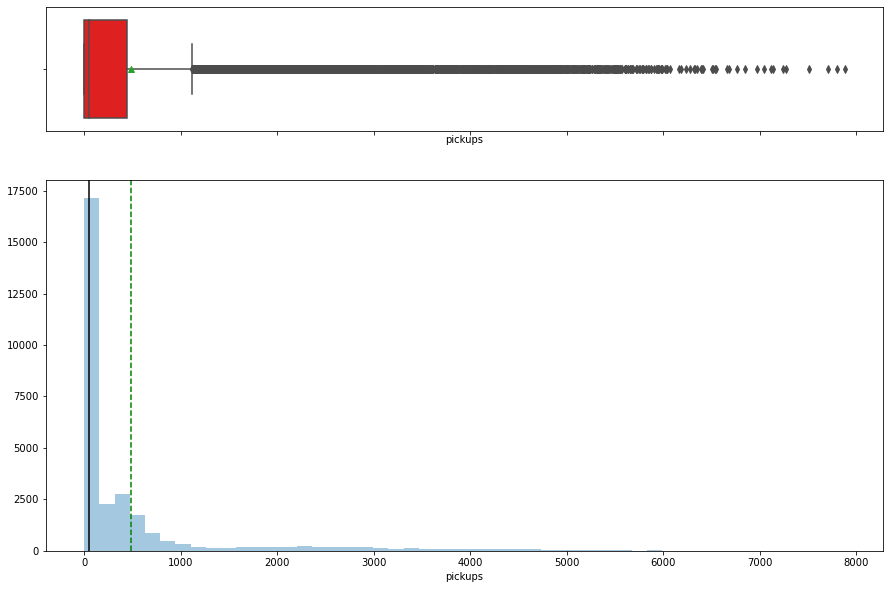

In [22]:
histogram_boxplot(df.pickups)

**Observations**
* The distribution of hourly pickups is highly right skewed
* Majority of the hourly pickups are close to 0
* Median pickups = 0 but the mean is ~500 
* There are a lot of outliers in this variable. 
* While most hourly pickups are at lower end, we have observations where hourly pickups went as high as 8000

##  Observations on Visibility

C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


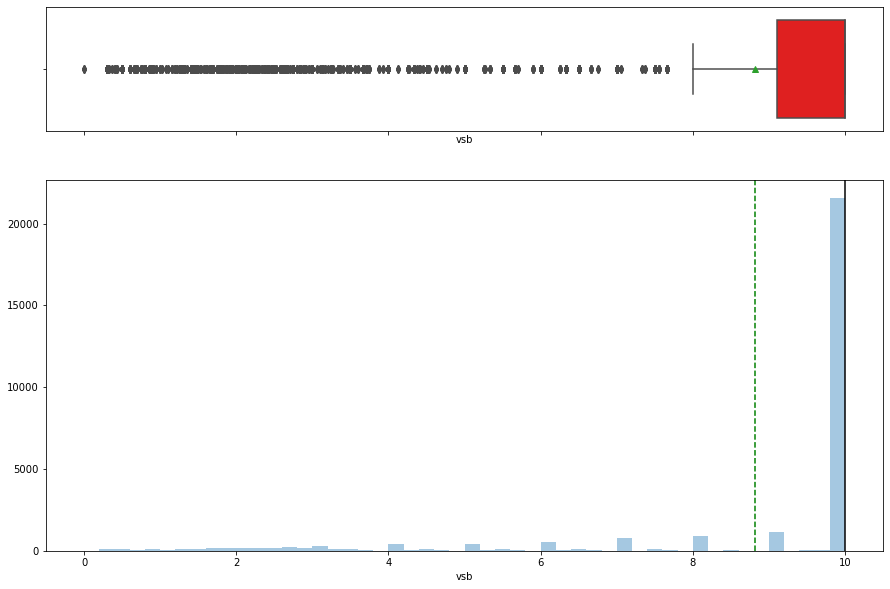

In [23]:
histogram_boxplot(df.vsb)

**Observations**
* visibility  is left skewed
* Both the mean and median are high indicating that the visibility is good on most days
* There are however outliers towards the left, indicating that visibility is extremely low on some days.
* It will be interesting to see how visibility  affects the uber pickup frequency

## Observations on Temperature

C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


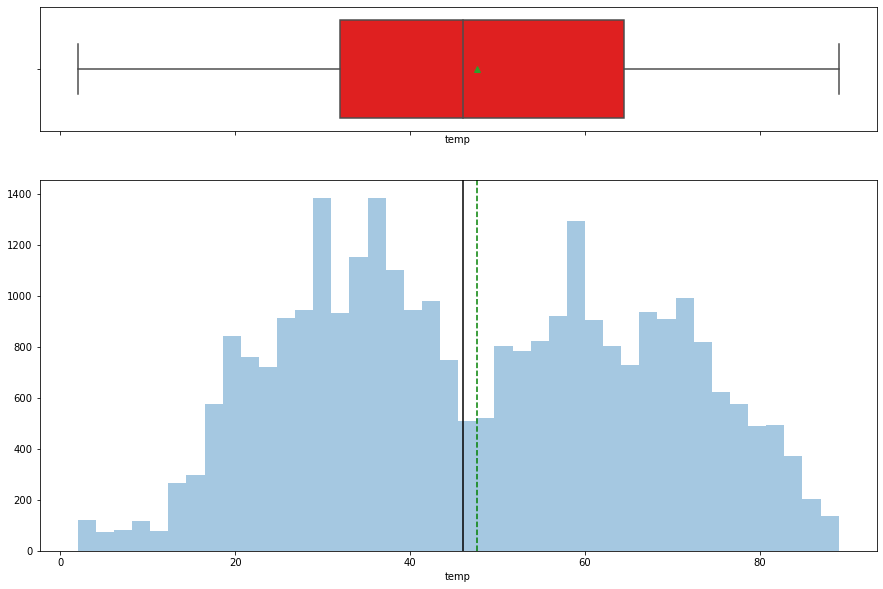

In [24]:
histogram_boxplot(df.temp)

**Observations**
* Temperature does not have any outliers.
* Two peaks (Bi-modal) can be seen for temp, one at around 35F other at around 60F. The hump is greater at 35F (~1.5 C) indicating cold weather conditions.

## Observations on Dew point

C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


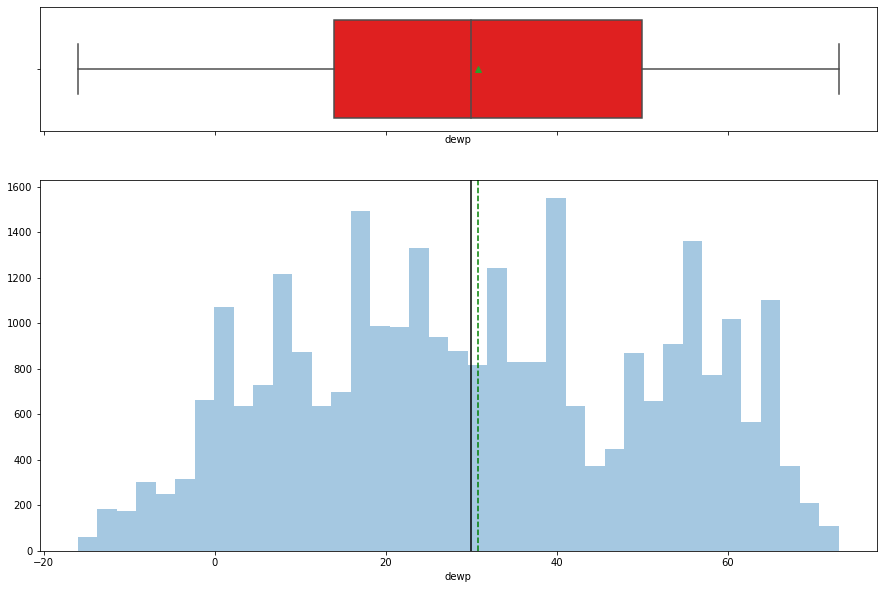

In [25]:
histogram_boxplot(df.dewp)

**Observations**
* There are no outliers for dew point either.
* The distribution is similar to that of temperature. It suggests possible correlation between the two variables.
* Dew point is an indication of humidity, which is correlated with temperature.

## Observations on Sea level pressure

C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


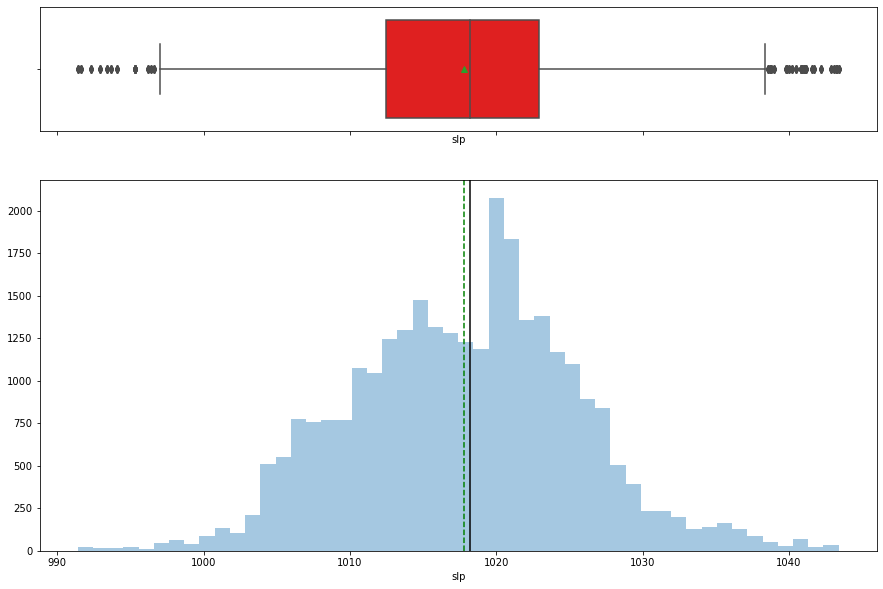

In [26]:
histogram_boxplot(df.slp)

**Observations**
* Sea level pressure distribution is close to normal.
* There are a few outliers on both the ends.

##  Observations on Liquid Precipitation (Rain)

1 hour liquid precipitation

C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


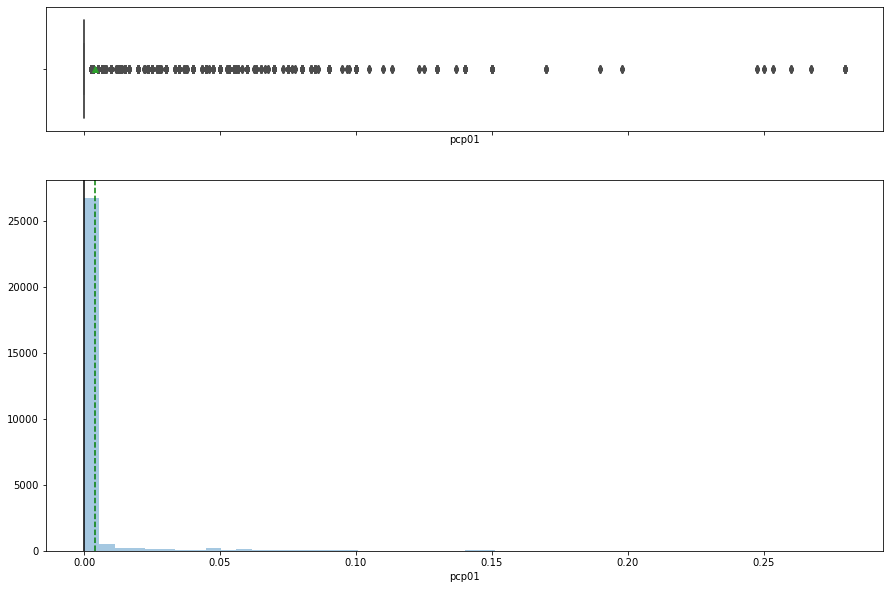

In [27]:
histogram_boxplot(df.pcp01)

6 hour liquid precipitation

C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


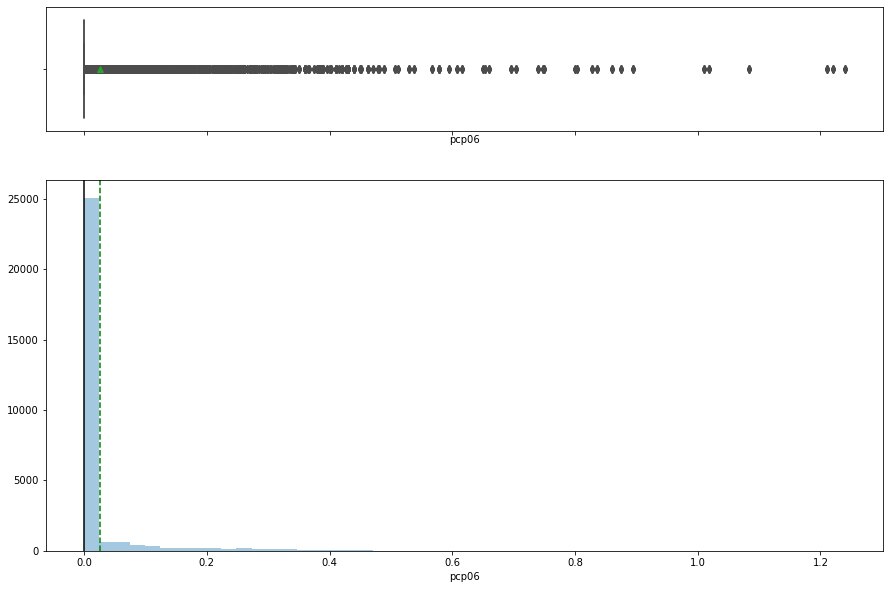

In [28]:
histogram_boxplot(df.pcp06)

* 24 hour liquid precipitation

C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


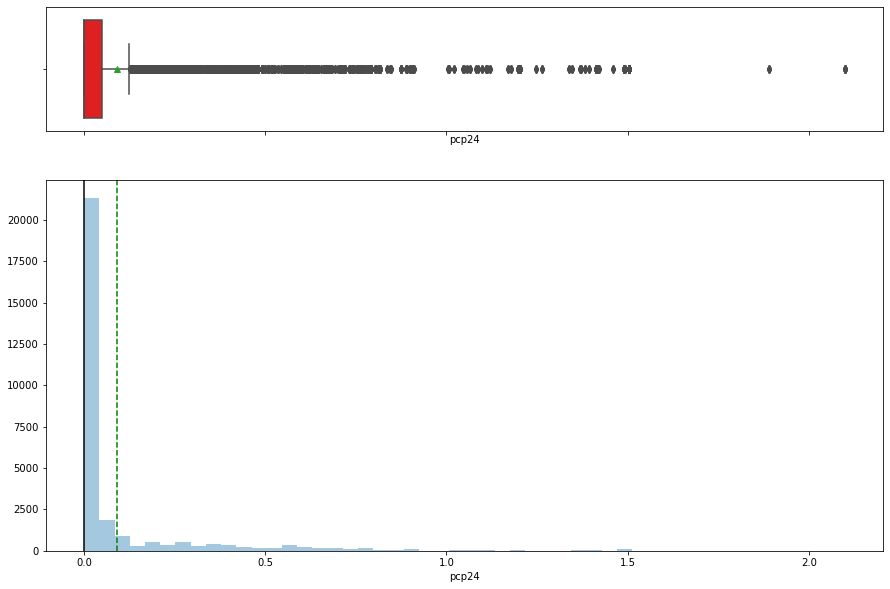

In [29]:
histogram_boxplot(df.pcp24)

**Observations**
* As expected, it rains on relatively fewer days in New York.
* Most of the days are dry.
* When it rains, and sometimes when it rains heavily, we get outliers.

## Observations on Snow Depth

C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


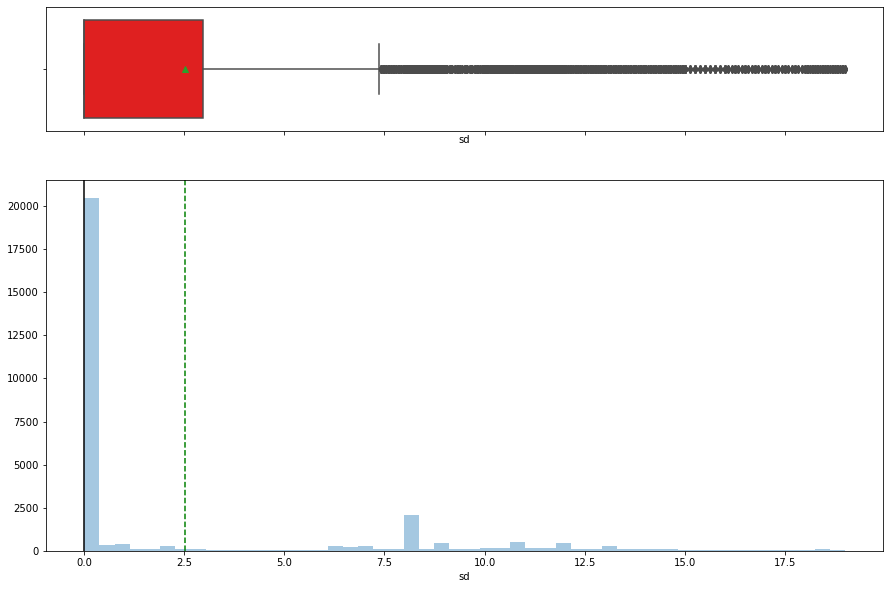

In [30]:
histogram_boxplot(df.sd)

**Observations**
* We do observe there is snowfall in the time period that we are analysing.
* There are outliers in this data.
* We will have to see how snowfall affects pickups. We know that very few people are likely to get out if it is snowing heavily, so our pickups will decrease when it snows. 

### Let us explore the categorical variables now

In [31]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

### Observations on holiday

C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


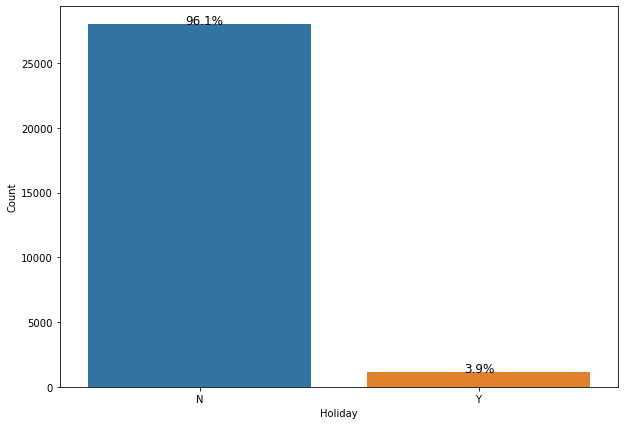

In [32]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['hday'])
plt.xlabel('Holiday')
plt.ylabel('Count')
bar_perc(ax,df['hday'])

**Observations**
* 3.9% of days were holidays.

### Observations on borough

C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


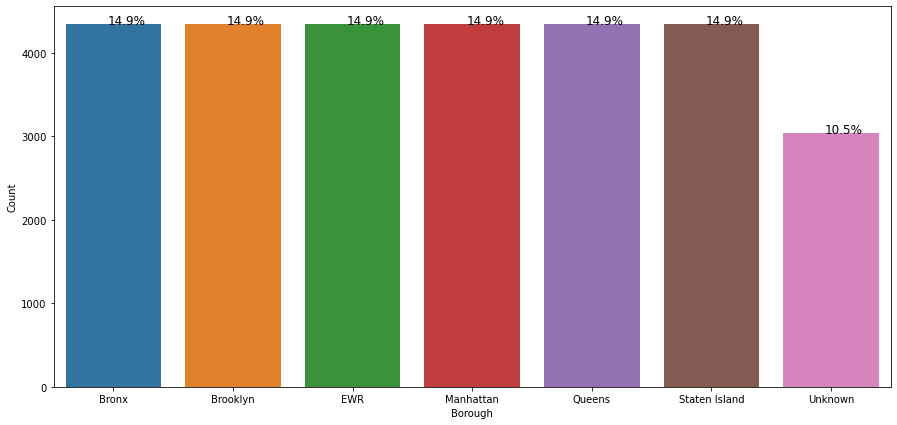

In [33]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df['borough'])
plt.xlabel('Borough')
plt.ylabel('Count')
bar_perc(ax,df['borough'])

* The observations are uniformly distributed across the boroughs except the observations that had a NaN values and were attributed to Unknown borough.

## Bivariate Analysis

Plot bivariate charts between variables to understand their interaction with each other.

### Correlation

<AxesSubplot:>

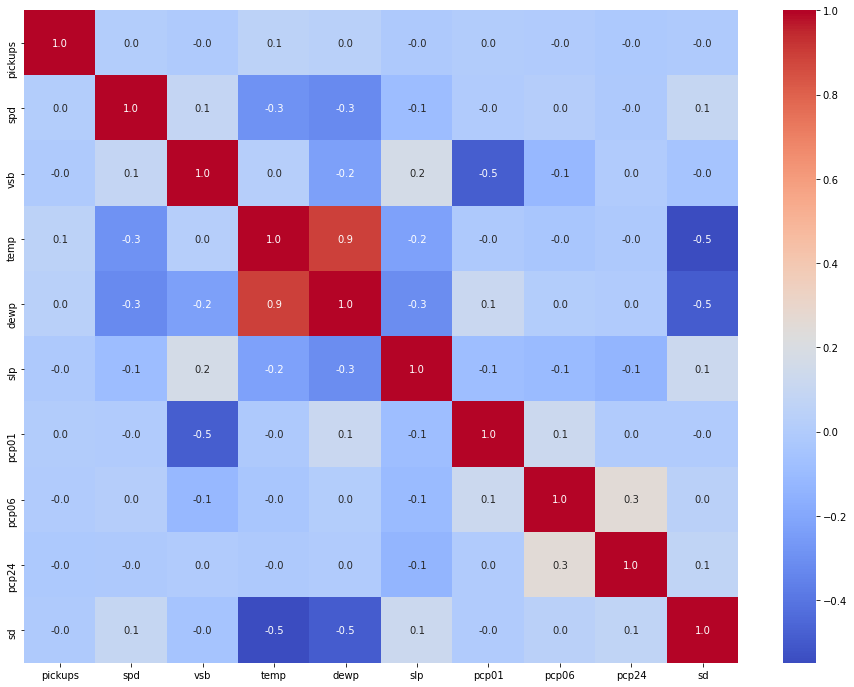

In [34]:
# Check for correlation among numerical variables
num_var = ['pickups','spd','vsb','temp','dewp', 'slp','pcp01', 'pcp06', 'pcp24', 'sd']

corr = df[num_var].corr()

# plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

**Observations**
* As expected, temperature shows high correlation with dew point
* Visibility is negatively correlated with precipitation. If the rains are high during the hour, visibility is low. This is inline with our intuitive understanding. 
* Snow depth of course would be negatively correlated with temperature.
* Wind speed and sea level pressure is negatively correlated with temperature. As the temperature increases, wind speeds decrease and so does sea level pressure. 
* It is important to note that correlation does not imply causation.
* There does not seem to be a strong relationship between number of pickups and weather stats. 

### Bivariate Scatter Plots

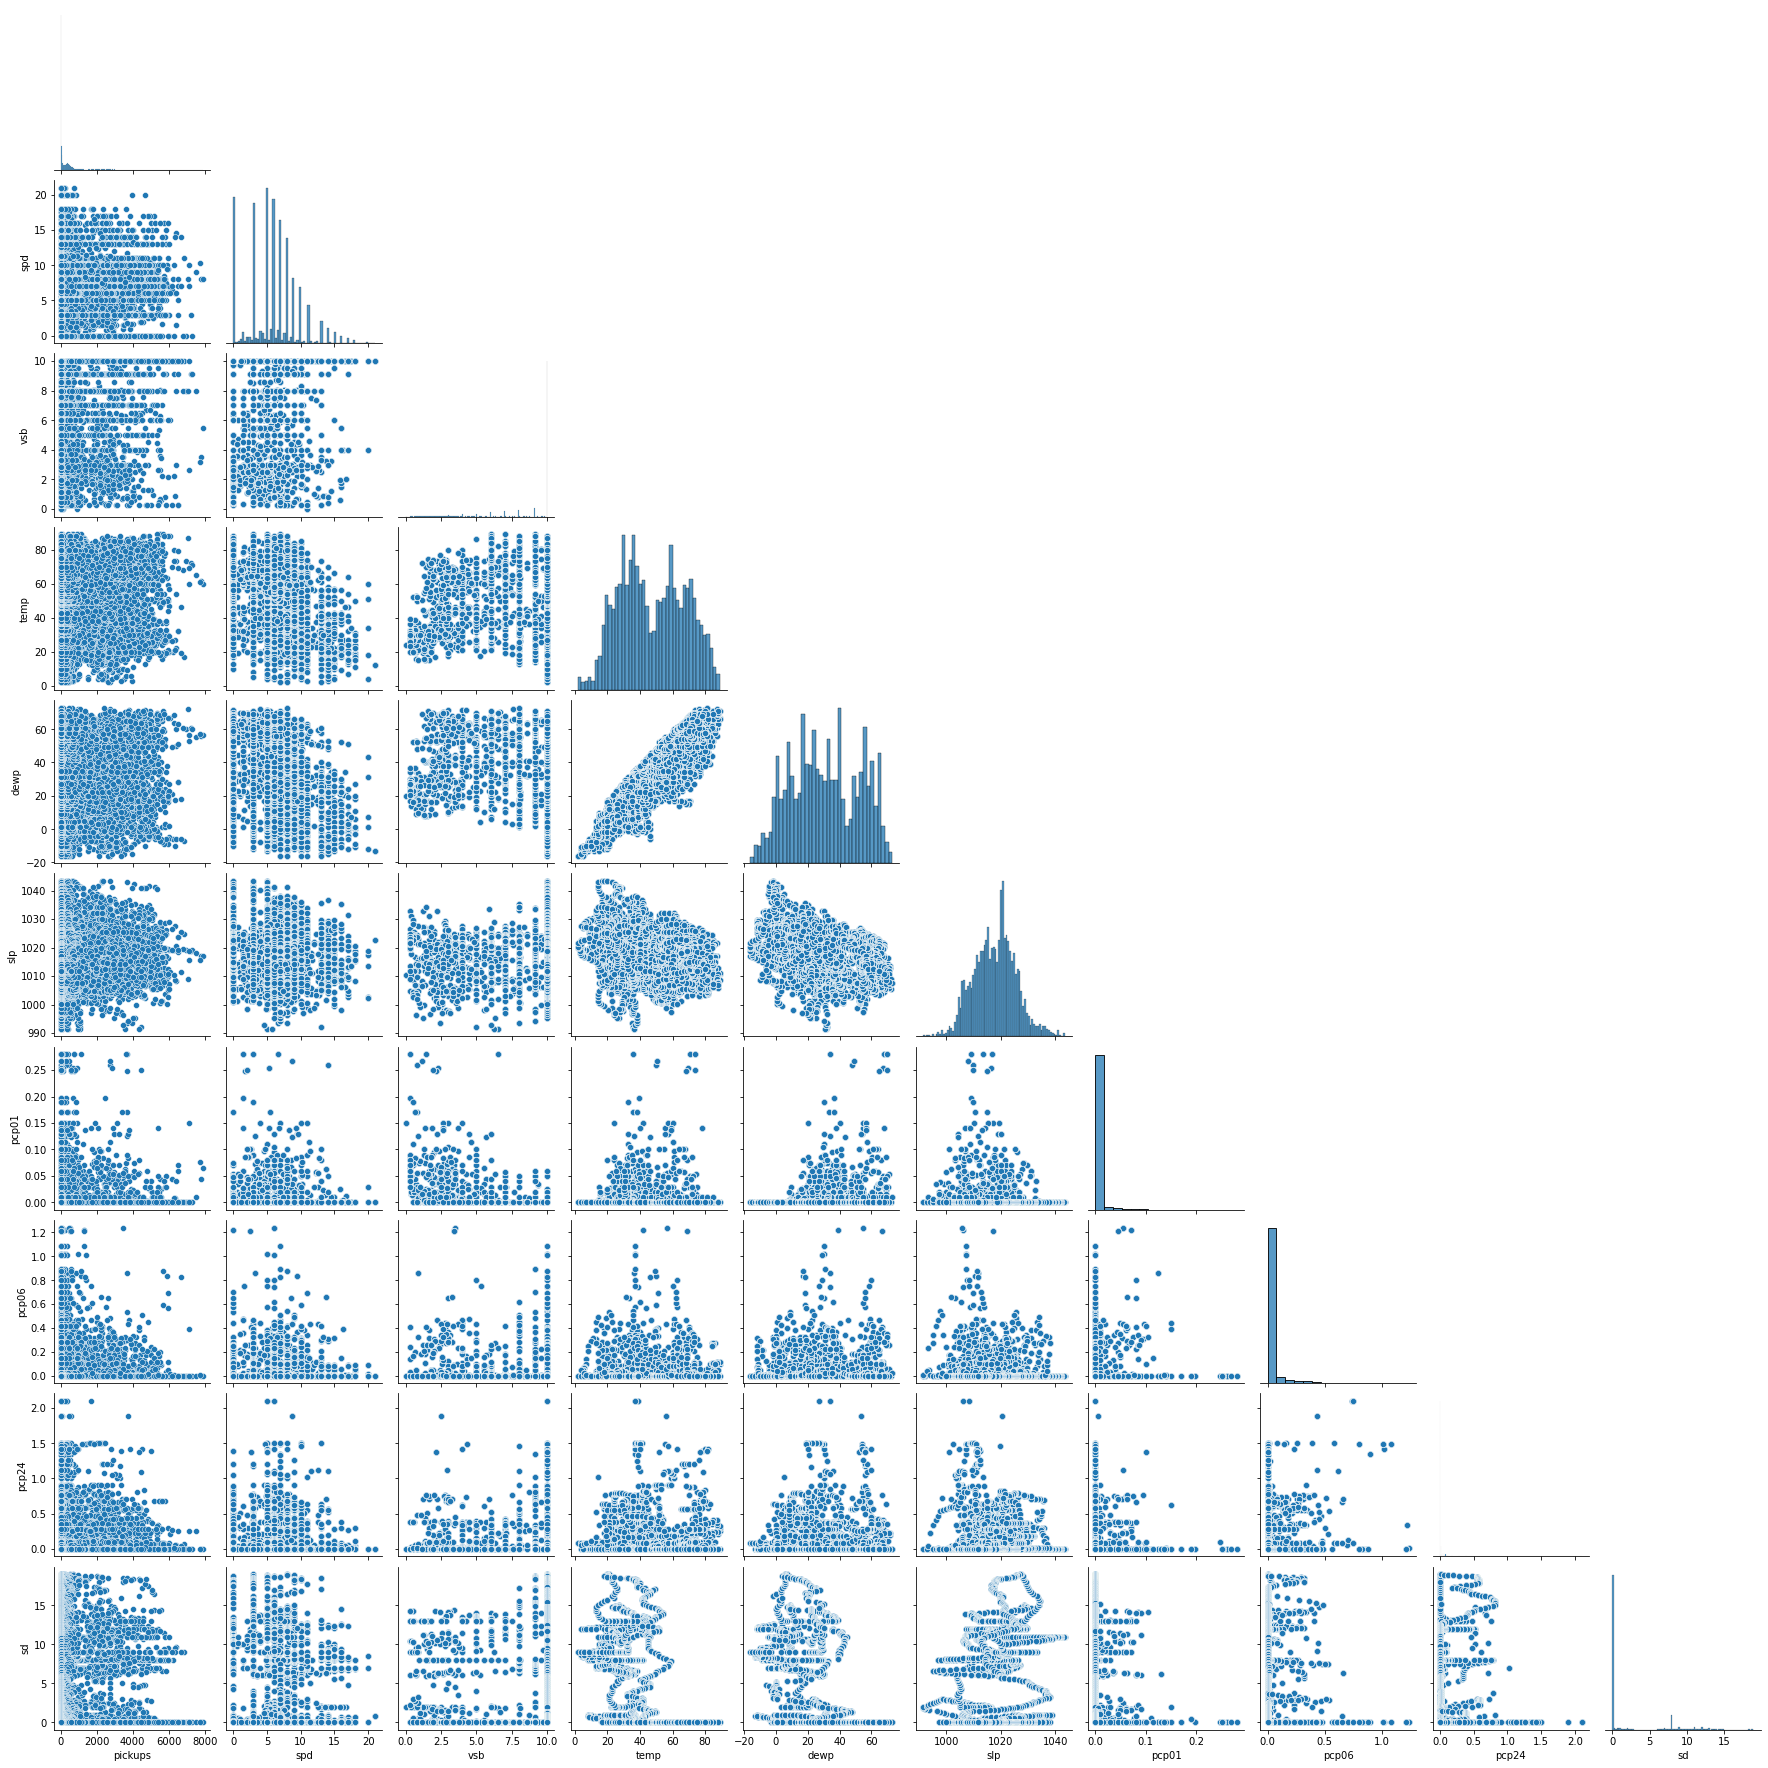

In [35]:
sns.pairplot(df[num_var], corner=True)

**Observations**
* we get the same observation as from the correlation plot
* There does not seem to be a strong relationship between number of pickups and weather stats. 

### Relationship between pickups and time based variables

#### Pickups across months

In [36]:
df.columns

Index(['borough', 'pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01',
       'pcp06', 'pcp24', 'sd', 'hday', 'start_year', 'start_month',
       'start_hour', 'start_day', 'week_day'],
      dtype='object')

Text(0.5, 0, 'Month')

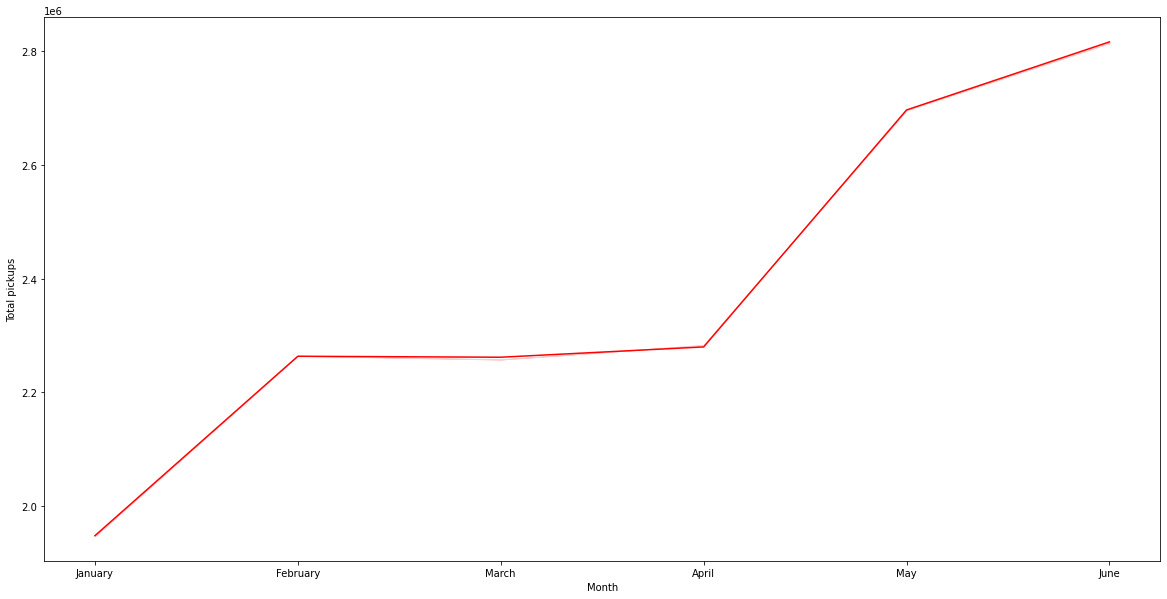

In [37]:
cats = df.start_month.unique().tolist()
df.start_month = pd.Categorical(df.start_month, ordered=True, categories=cats)

plt.figure(figsize=(20,10))
sns.lineplot(x="start_month", y="pickups",data=df,ci=0,color="RED",estimator='sum')
plt.ylabel('Total pickups')
plt.xlabel('Month')

**Observations**
* There is clear increasing trend in monthly bookings
* Bookings in June are almost 1.5 times that of Jan

#### Pickups vs Days of the Month

Text(0.5, 0, 'Day of Month')

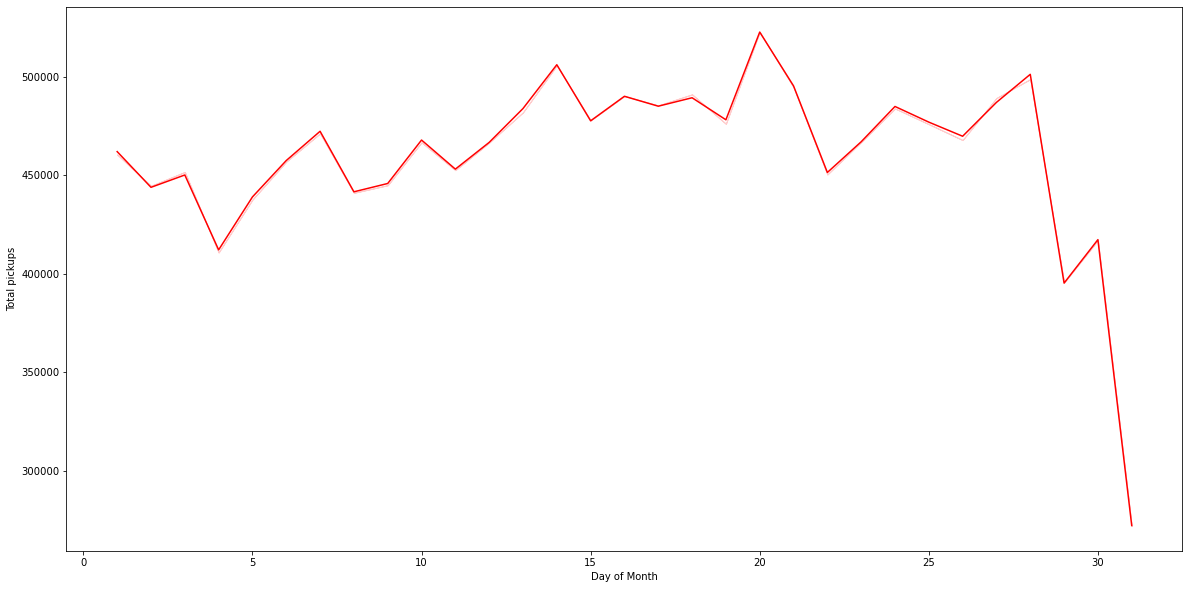

In [38]:
plt.figure(figsize=(20,10))
sns.lineplot(x="start_day", y="pickups",estimator='sum',ci=0,data=df,color="RED")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')

**Observations**
* There is a steepfall in the bookings on the last day of the month.
* This can partially be attributed to month of Feb having just 28 days. We can drop Feb and have a look at this chart again.
* There is a peak in the bookings around 20th day of month

In [39]:
df.columns
df.start_month.unique()

['January', 'February', 'March', 'April', 'May', 'June']
Categories (6, object): ['January' < 'February' < 'March' < 'April' < 'May' < 'June']

Text(0.5, 0, 'Day of Month')

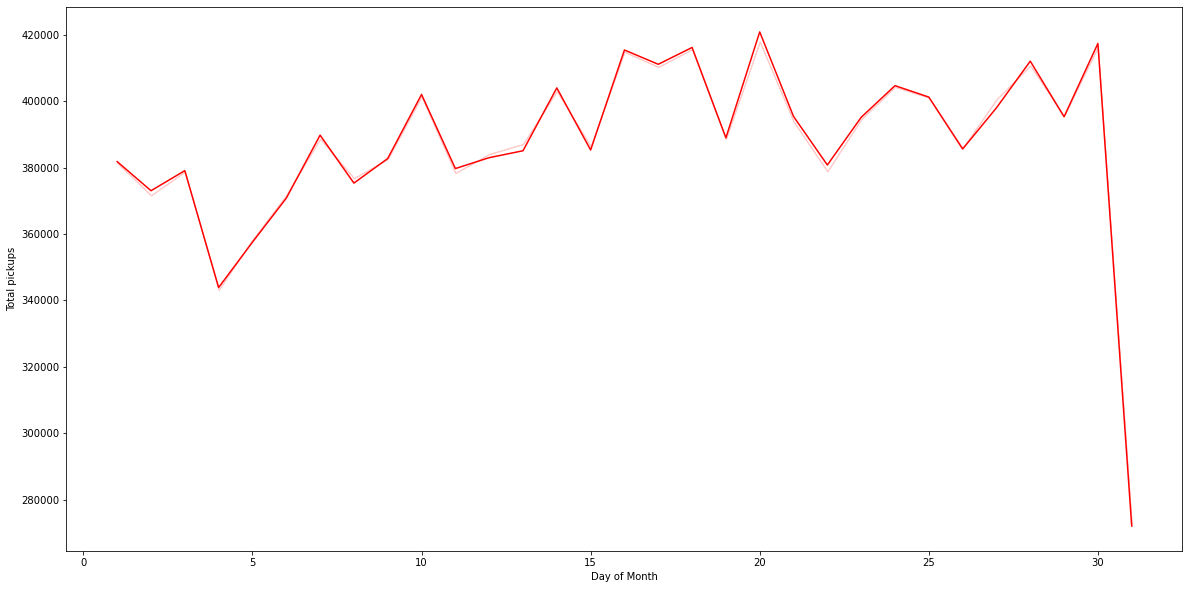

In [40]:
# lets us drop the feb month and see
df_not_feb =  df[df['start_month'] != 'February']
plt.figure(figsize=(20,10))
sns.lineplot(x="start_day", y="pickups",estimator='sum',ci=0,data=df_not_feb,color="RED")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')

**Observations**
* We see the expected increase in relative position of number of pickups on 29th to 30th
* Number of pickups for 31 is still low because not all months have the 31st day.

#### Pickups across Hour of Day

Text(0.5, 0, 'Hour of the day')

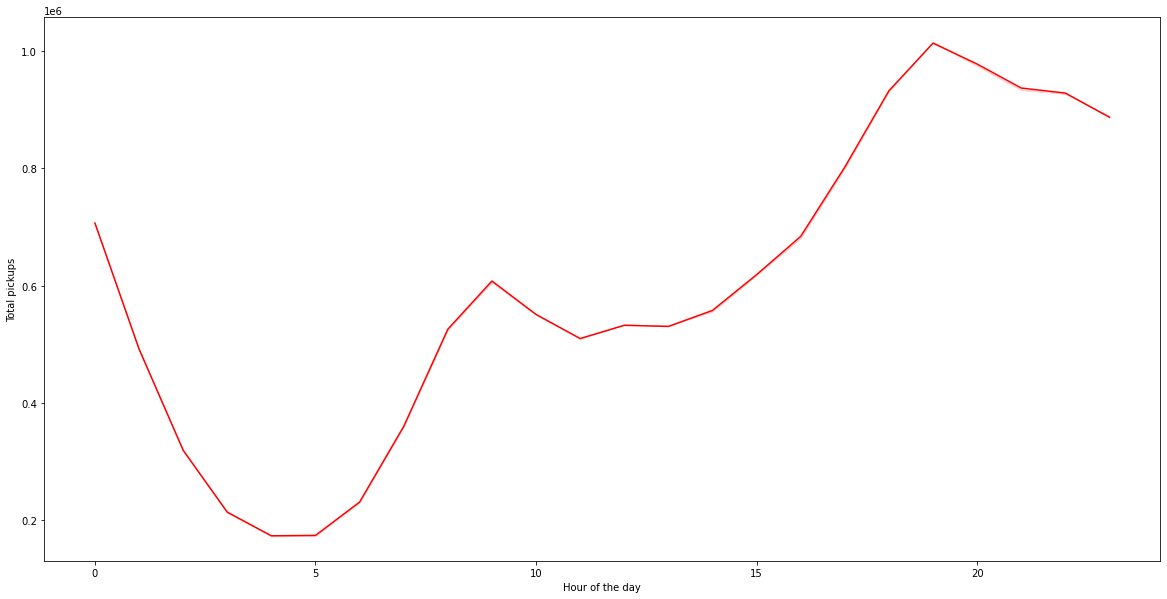

In [41]:
plt.figure(figsize=(20,10))
sns.lineplot(x="start_hour", y="pickups",estimator='sum',ci=0,data=df,color="RED")
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')

**Observations**
* Bookings peak around 19th and 20th hour of the day and decreases till 5 AM in the morning.
* The peak can be attributed to the time people leave their workplaces
* From 5 AM onwards, we can see an increasing trend till 10, possibly the office rush.
* Pickups then go down from 10AM to 12PM post which they start increasing.

#### Pickups across Weekdays

Text(0.5, 0, 'Weeks')

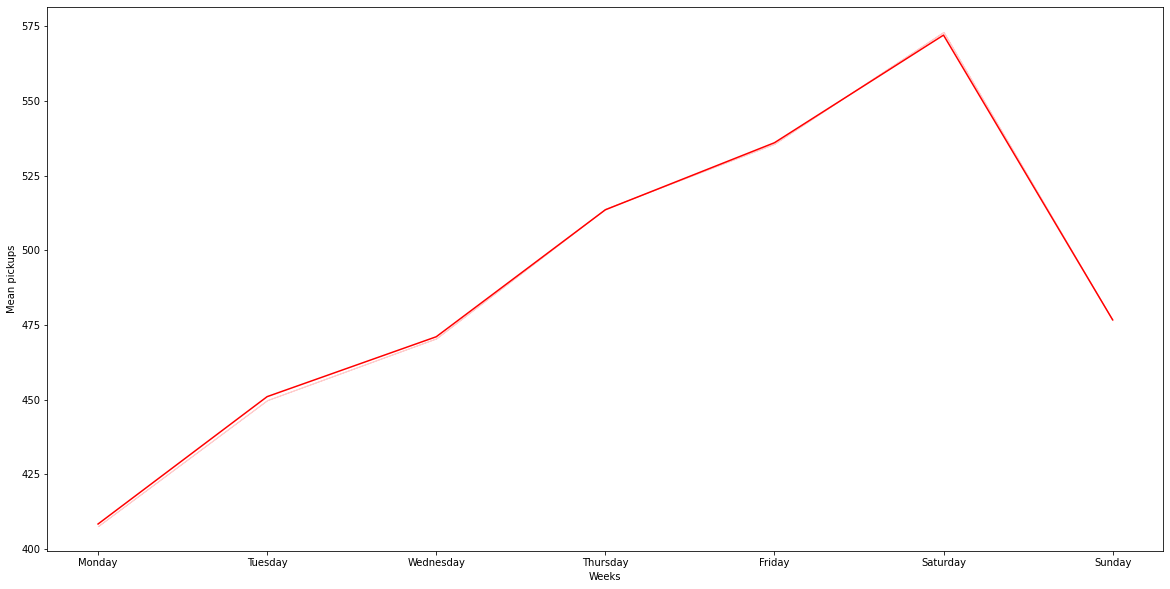

In [42]:
cats = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
df.week_day = pd.Categorical(df.week_day, ordered=True, categories=cats)

plt.figure(figsize=(20,10))
sns.lineplot(x="week_day", y="pickups",ci=0,data=df,color="RED")
plt.ylabel('Mean pickups')
plt.xlabel('Weeks')


**Observations**
* Pickups gradually increase as the week progresses and starts dropping down after saturday.
* We need to do more investigation to understand why demand for Ubers is low in the beginning of the week.

#### Pickups across Borough

C:\Users\Md farooque\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Borough')

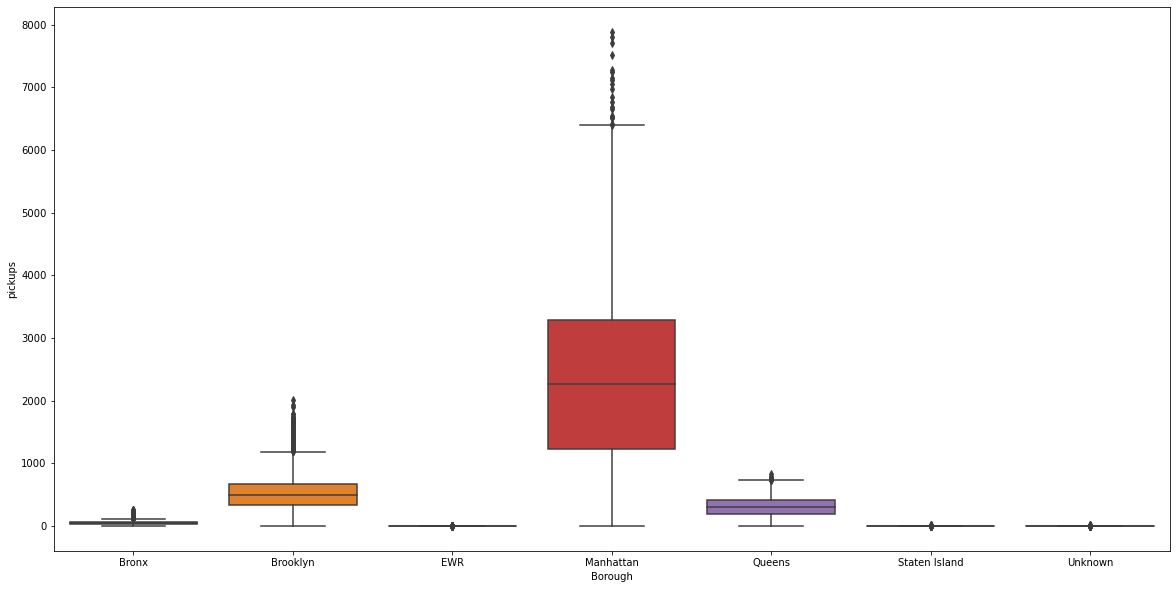

In [43]:
plt.figure(figsize=(20,10))           
sns.boxplot(df['borough'],df['pickups'])
plt.ylabel('pickups')
plt.xlabel('Borough')

**Observations**
* There is a clear difference in ridership across the different boroughs.
* Manhattan has the highest no of bookings
* Brooklyn and Queens are distant followers
* EWR, Unknown and Staten Island have very low bookings. The demand is so small that probably it can be covered by the drop-offs of the inbound trips from other areas.

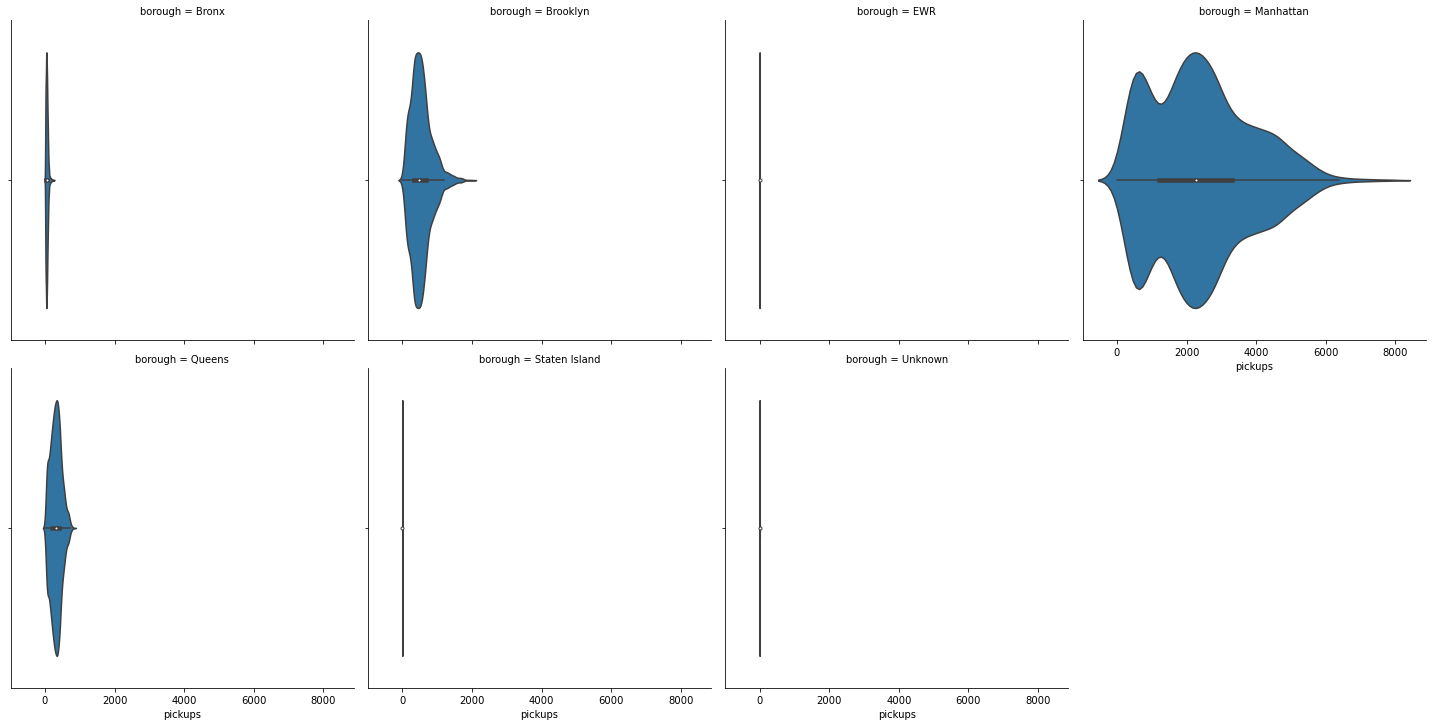

In [44]:
# Dispersion of pickups in every borough
sns.catplot(x='pickups',
             col='borough', 
             data=df,
             col_wrap=4,
             kind="violin")

**Observations**
* Manhatten and Brooklyn pickups distribution is right skewed while Queens pickups distribution follows normal distribution.


#### Relationship between pickups and holidays

In [45]:
df.groupby('hday')['pickups'].mean()

hday
N    492.339957
Y    437.199822
Name: pickups, dtype: float64

In [46]:
# Check if the trend is similar across boroughs
df.groupby(by = ['borough','hday'])['pickups'].mean()

borough        hday
Bronx          N         50.771073
               Y         48.065868
Brooklyn       N        534.727969
               Y        527.011976
EWR            N          0.023467
               Y          0.041916
Manhattan      N       2401.302921
               Y       2035.928144
Queens         N        308.899904
               Y        320.730539
Staten Island  N          1.606082
               Y          1.497006
Unknown        N          2.057456
               Y          2.050420
Name: pickups, dtype: float64

**Observations**
1. The mean pickups on a holiday is lesser than a non-holiday.
2. Except Manhattan, in all the other boroughs, mean pickups on a holiday is very similar to a non holiday.
3. In Queens, mean pickups on a holiday are higher.
4. There are hardlyany pickups in EWR.

## Multivariate Analysis

Text(0.5, 0, 'Hour of the day')

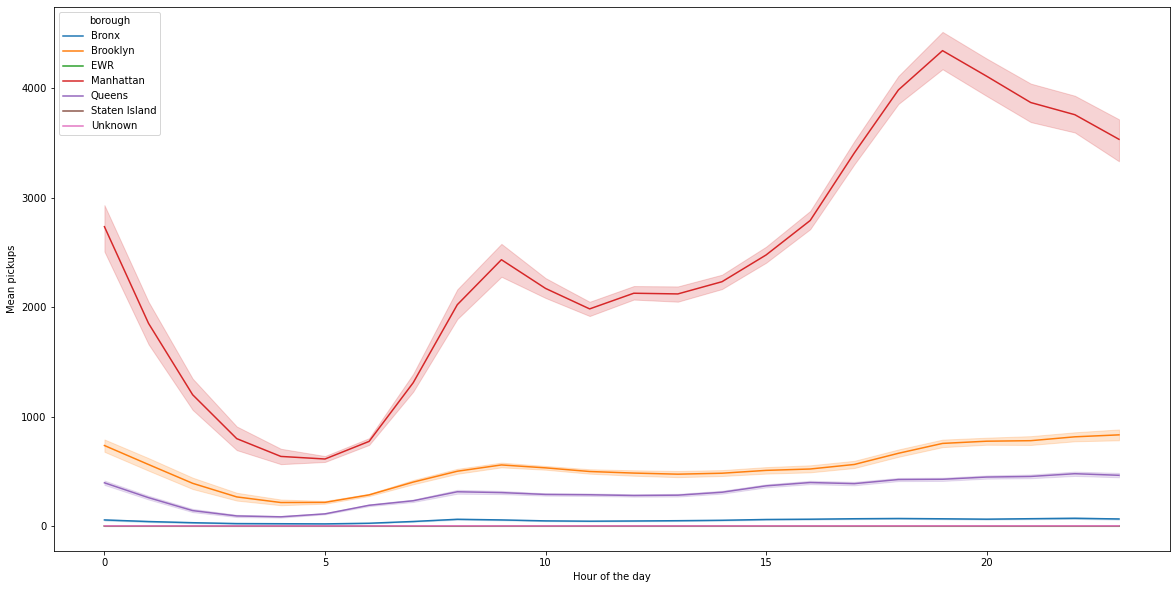

In [47]:
plt.figure(figsize=(20,10))
sns.lineplot(x="start_hour", y="pickups", ci=95, data=df, hue='borough')
plt.ylabel('Mean pickups')
plt.xlabel('Hour of the day')


The number of pickups in Manhattan is very high and dominant when we see the spread across boroughs. Let us try converting the pickups on a logrithmic scale.

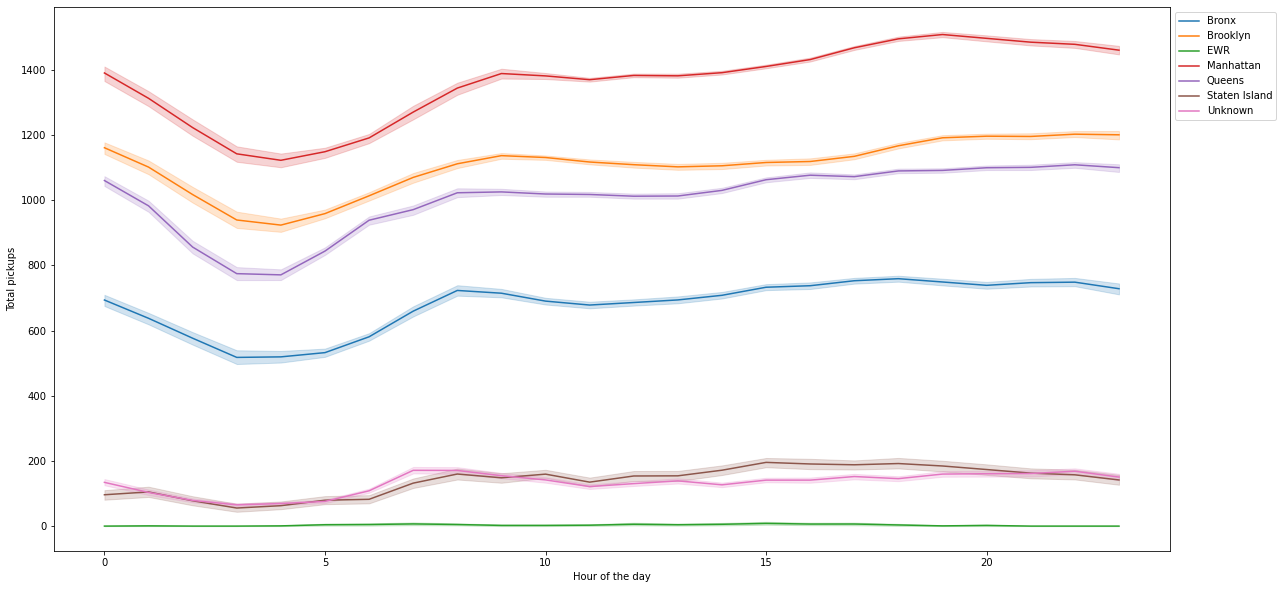

In [48]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df.start_hour, y=np.log1p(df.pickups), estimator='sum', ci=95, hue=df.borough)
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.legend(bbox_to_anchor=(1, 1))

**Observations**
* Hourly pattern can be seen in all the boroghs. 
* Especially on the second plot where a logarithmic scale has been applied to Y axis, it is obvious that the 4 major boroughs follow the exact same pattern. 
* The value of Staten Island and Unknown are more scattered
* EWR seems to have a random demand with the majority of the values being zero with a few 1s and 2s.
* Borough and hour of the day combined could be good predictors of pickups.
* Manhattan sees the most uber pickups. Let us explore this borough in more details.

#### Manhattan Pickups Heatmap - Weekday + Hour

<AxesSubplot:xlabel='week_day', ylabel='start_hour'>

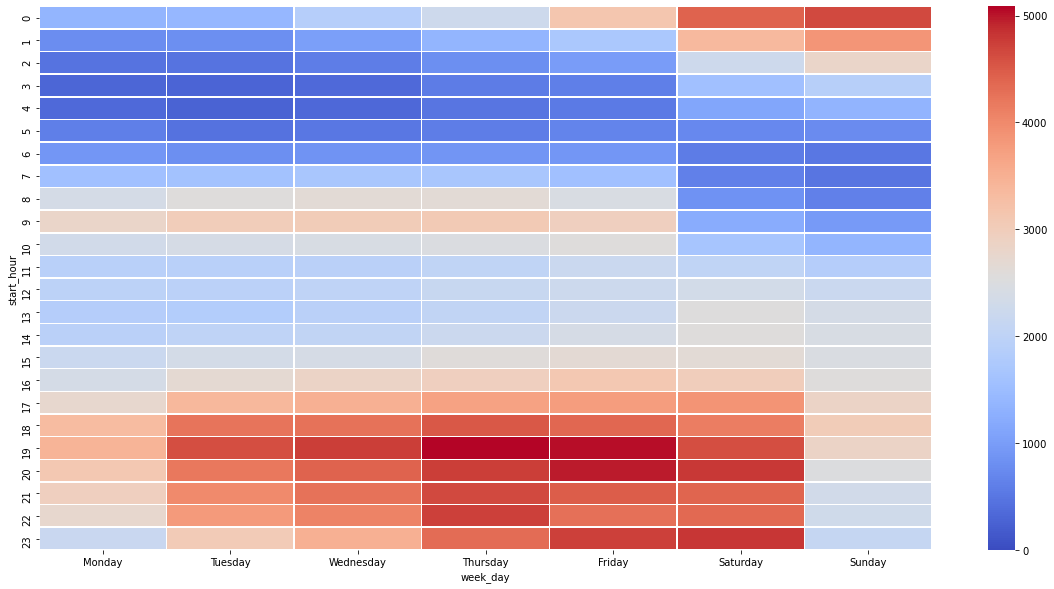

In [49]:
df_man = df[df.borough=='Manhattan']
df_hm =df_man.pivot_table(index = 'start_hour',columns ='week_day',values ='pickups')
# Draw a heatmap 
plt.figure(figsize = (20,10)) # To resize the plot
sns.heatmap(df_hm,  fmt="d", cmap='coolwarm', linewidths=.5, vmin=0)

**Observations**
* The demand for Uber peaks during the late hours of the day when people are returning home from office.
* Demand continues to be high during the late hours of the day (midnight) on fridays and saturdays.  
* It is odd that the demand of Uber is no as high on monday evenings as compared to other working days.

### Let us see if a similar trend exists in Brooklyn

<AxesSubplot:xlabel='week_day', ylabel='start_hour'>

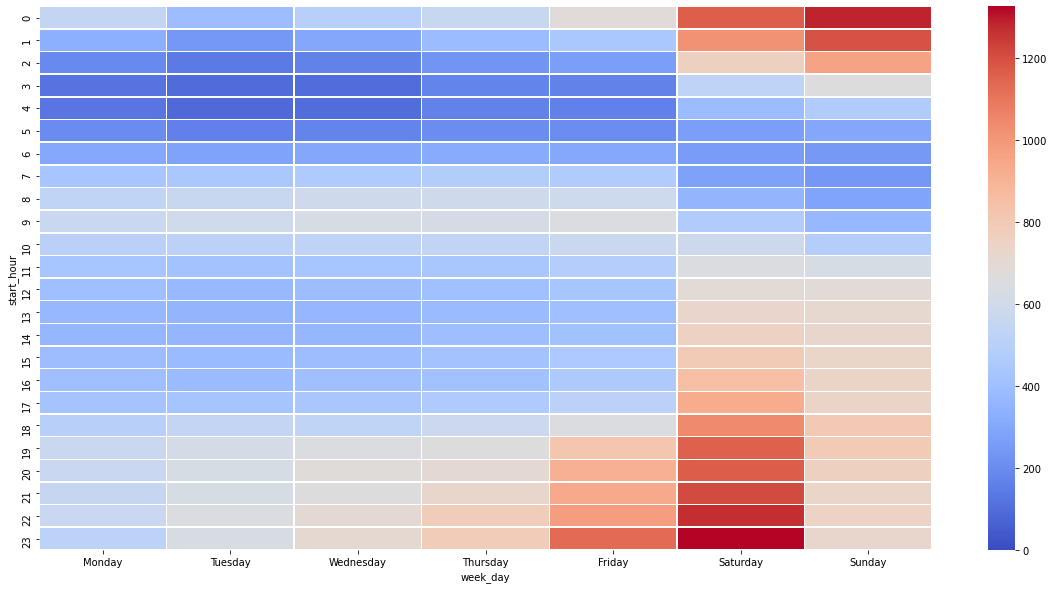

In [50]:
df_br = df[df.borough=='Brooklyn']
df_hm =df_br.pivot_table(index = 'start_hour',columns ='week_day',values ='pickups')
# Draw a heatmap 
plt.figure(figsize = (20,10)) # To resize the plot
sns.heatmap(df_hm,  fmt="d", cmap='coolwarm',linewidths=.5, vmin = 0)

* In Brooklyn, the trend of high uber demand during the late hours of friday and saturday is more pronounced.

# **Conclusion and Recommendations**

## Conclusion

We analysed a dataset of nearly 30K hourly Uber pickup information, from New York boroughs.
The data spanned everyday of first six months of the year 2015.
The main feature of interest here is the number of pickups. 
Both from environmental and business perspective, having cars roaming in an area while the demand is in another or filling the streets with cars during a low demand period while lacking during peak hours is inefficient. Thus we determined the factors that affect pickup and the nature of their effect.

We have been able to conclude that 

1. Uber cabs are most popular in the Manhattan area of New York.
2. Contrary to intuition, weather conditions do not have much impact on the number of Uber pickups.
3. The demand for Ubers has been increasing steadily over the months (Jan to June).
4. The rate of pickups is higher on the weekends as compared to weekdays.
5. It is encouraging to see that New Yorkers trust Uber taxi services when they step out to enjoy their evenings.
6. We can also conclude that people use Ubers for regular office commutes. The demand steadily increases from 6AM to 10AM in the morning,then declines a little and starts picking up at 12PM. The demand peaks at 7-8 PM at night.
7. We need to further investigate the low demand for Ubers on Mondays.


## Recommendation to business

1. Manhattan is the most mature market for Uber. Brooklyn, Queens and Bronx show potential. 
2. There has been a gradual increase in Uber rides over the last few months and we need to keep up the momentum.
3. Riderships are high at peak office commute hours on week days and during late evenings on Saturday. Cab availability must be ensured during these times.
4. The demand for cabs is highest during saturday nights. Cab availability must be ensured during this timeof the week.
5. Procure data for fleet size availability to get a better understanding of demand-supply status and build a machine learning model to accurately predict pickups per hour, to optimise the cab fleet in respective areas.
6. Procure more data on price and build a model that can predict optimal pricing.

##  Furthur Analysis

1. Dig deeper to explore the variation in cab demand, during working days and non-working days. You can combine Weekends+Holiday to be Non-working days and Weekdays to be the working days.
2. Drop the boroughs that have negligible pickups and then analyse the data to uncover more insights.
3. Try automated data profiling using Pandas Profiling. 

In [53]:
# let us try pandas-profiling now and see how does it simplifies the EDA
#!pip install pandas-profiling==2.8.0

^C


Or,
Install pandas-profiling using anaconda prompt, Use the command ->
conda install -c conda-forge pandas-profiling

In [55]:
from pandas_profiling import ProfileReport
# Use the original dataframe, so that original features are considered
prof = ProfileReport(data)
# to view report created by pandas profile
prof

In [57]:
# to save report obtained via pandas profiling
prof.to_file('output.html')